## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [06] : [Support Vector Machine] </div>

#### <div align="center"> Semester Ganjil 2023/2024 </div>

In [69]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Reinhard Javera Maheswara"
myNIM = "77732"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Reinhard Javera Maheswara
NIM: 		77732
Start: 		2024-10-07 22:52:46.732341
Device ID: 	327d9a1a-84c4-11ef-950f-a1f6af4a426d



---

### Dataset yang dipakai:

1. [Heart Disease Dataset] – sumber : [https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset]
2. [Heart Failure Prediction Dataset] – sumber : [https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction]

### Hasil kerja

### Binary Class SVM

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Linear SVM Accuracy: 0.7342657342657343


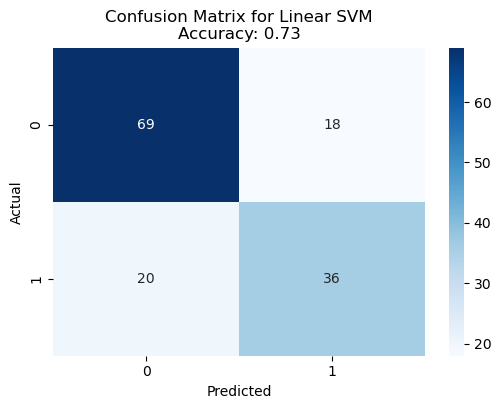

Non-Linear SVM (RBF Kernel) Accuracy: 0.7412587412587412


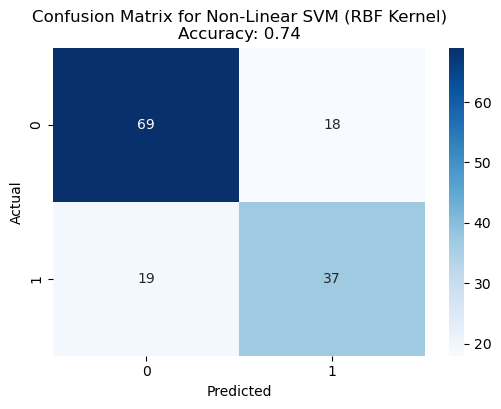

In [71]:
# Load the dataset (adjust the file path as needed)
data = pd.read_csv('titanic.csv') 

# Preprocessing
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1.1 Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
linear_acc = accuracy_score(y_test, y_pred_linear)
print("Linear SVM Accuracy:", linear_acc)

# Plot confusion matrix for Linear SVM
cm_linear = confusion_matrix(y_test, y_pred_linear)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Linear SVM\nAccuracy: {linear_acc:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 1.2 Non-linear SVM (RBF Kernel)
nonlinear_svm = SVC(kernel='rbf')
nonlinear_svm.fit(X_train, y_train)
y_pred_nonlinear = nonlinear_svm.predict(X_test)
nonlinear_acc = accuracy_score(y_test, y_pred_nonlinear)
print("Non-Linear SVM (RBF Kernel) Accuracy:", nonlinear_acc)

# Plot confusion matrix for Non-Linear SVM
cm_nonlinear = confusion_matrix(y_test, y_pred_nonlinear)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nonlinear, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Non-Linear SVM (RBF Kernel)\nAccuracy: {nonlinear_acc:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [72]:
from sklearn.metrics import classification_report

# Display evaluation metrics for Linear SVM
print("Evaluation Metrics for Linear SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))


Evaluation Metrics for Linear SVM:
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        87
           1       0.67      0.64      0.65        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.73      0.73      0.73       143



In [73]:
# Display evaluation metrics for Non-Linear SVM
print("Evaluation Metrics for Non-Linear SVM (RBF Kernel):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nonlinear):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nonlinear))

Evaluation Metrics for Non-Linear SVM (RBF Kernel):
Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        87
           1       0.67      0.66      0.67        56

    accuracy                           0.74       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.74      0.74      0.74       143



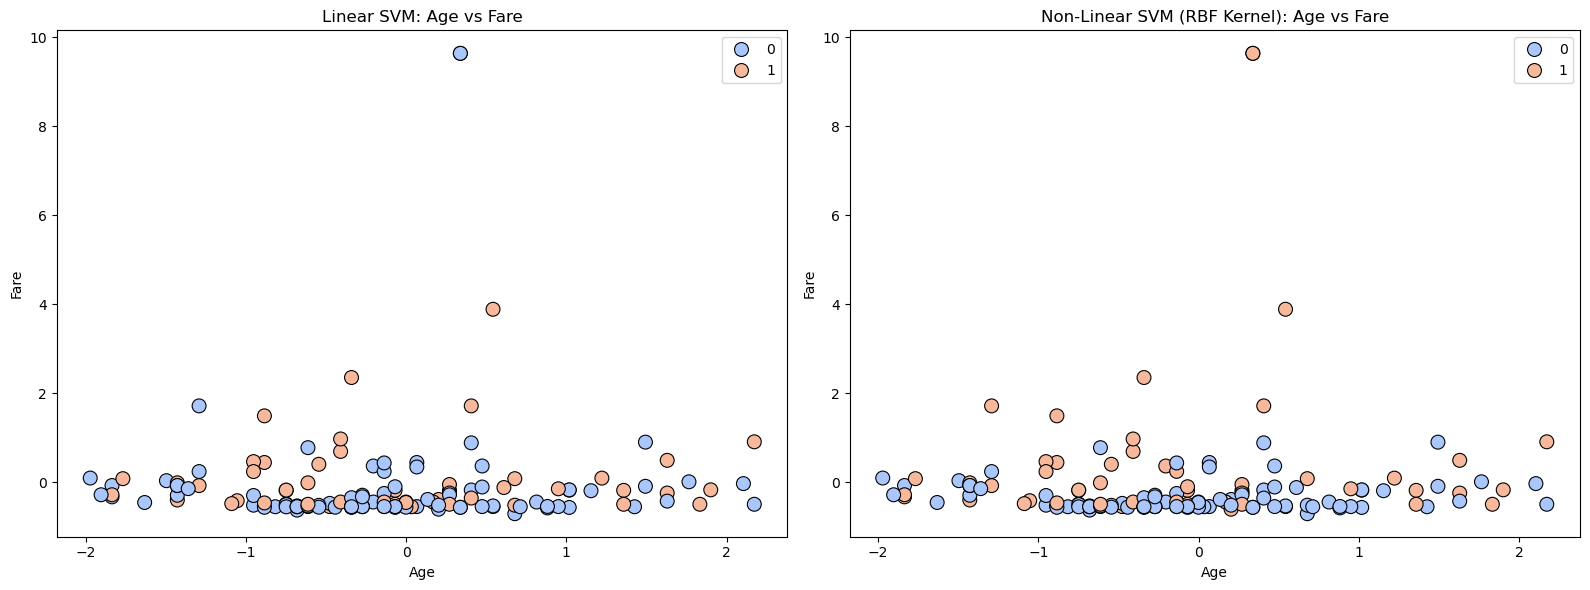

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 1.1 Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

# 1.2 Non-Linear SVM (RBF Kernel)
nonlinear_svm = SVC(kernel='rbf')
nonlinear_svm.fit(X_train, y_train)
y_pred_nonlinear = nonlinear_svm.predict(X_test)

# Create a figure with two subplots side by side
plt.figure(figsize=(16, 6))

# Plot for Linear SVM
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=y_pred_linear, palette='coolwarm', s=100, edgecolor='k')
plt.title('Linear SVM: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

# Plot for Non-Linear SVM (RBF Kernel)
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=y_pred_nonlinear, palette='coolwarm', s=100, edgecolor='k')
plt.title('Non-Linear SVM (RBF Kernel): Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

# Adjust layout
plt.tight_layout()
plt.show()

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load dataset
data = pd.read_csv('titanic.csv')

# Preprocessing
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].dropna()
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Age', 'Fare']]
y = data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Define plot boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the grid
Z = linear_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

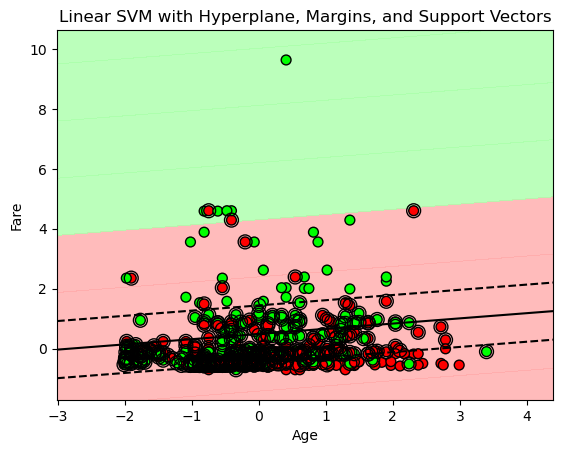

In [76]:
# Plot decision boundary and margins
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.contour(xx, yy, Z, colors='k', linestyles=['--', '-'], levels=[-1, 0, 1])

# Plot support vectors
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00']), s=50)
plt.scatter(linear_svm.support_vectors_[:, 0], linear_svm.support_vectors_[:, 1], 
           facecolors='none', edgecolors='k', s=100, marker='o')

plt.title('Linear SVM with Hyperplane, Margins, and Support Vectors')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = pd.read_csv('titanic.csv')

# Preprocessing
data = data[['Pclass', 'Age', 'Fare']].dropna()
X = data[['Age', 'Fare']]
y = data['Pclass']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.1 Multi-Class SVM with linear kernel
linear_svm = SVC(kernel='linear', decision_function_shape='ovr')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

# Display evaluation metrics for Linear SVM
print("Evaluation Metrics for Multi-Class SVM (Linear Kernel):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))

# 2.2 Multi-Class SVM with Non-linear kernel (RBF)
nonlinear_svm = SVC(kernel='rbf', decision_function_shape='ovr')
nonlinear_svm.fit(X_train, y_train)
y_pred_nonlinear = nonlinear_svm.predict(X_test)

# Display evaluation metrics for Non-Linear SVM
print("\nEvaluation Metrics for Multi-Class SVM (RBF Kernel):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nonlinear):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nonlinear))

Evaluation Metrics for Multi-Class SVM (Linear Kernel):
Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.74      0.79        35
           2       0.27      0.19      0.23        31
           3       0.73      0.86      0.79        77

    accuracy                           0.69       143
   macro avg       0.61      0.60      0.60       143
weighted avg       0.66      0.69      0.67       143


Evaluation Metrics for Multi-Class SVM (RBF Kernel):
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.74      0.79        35
           2       0.35      0.19      0.25        31
           3       0.75      0.92      0.83        77

    accuracy                           0.72       143
   macro avg       0.65      0.62      0.62       143
weighted avg       0.68      0.72      0.69       143



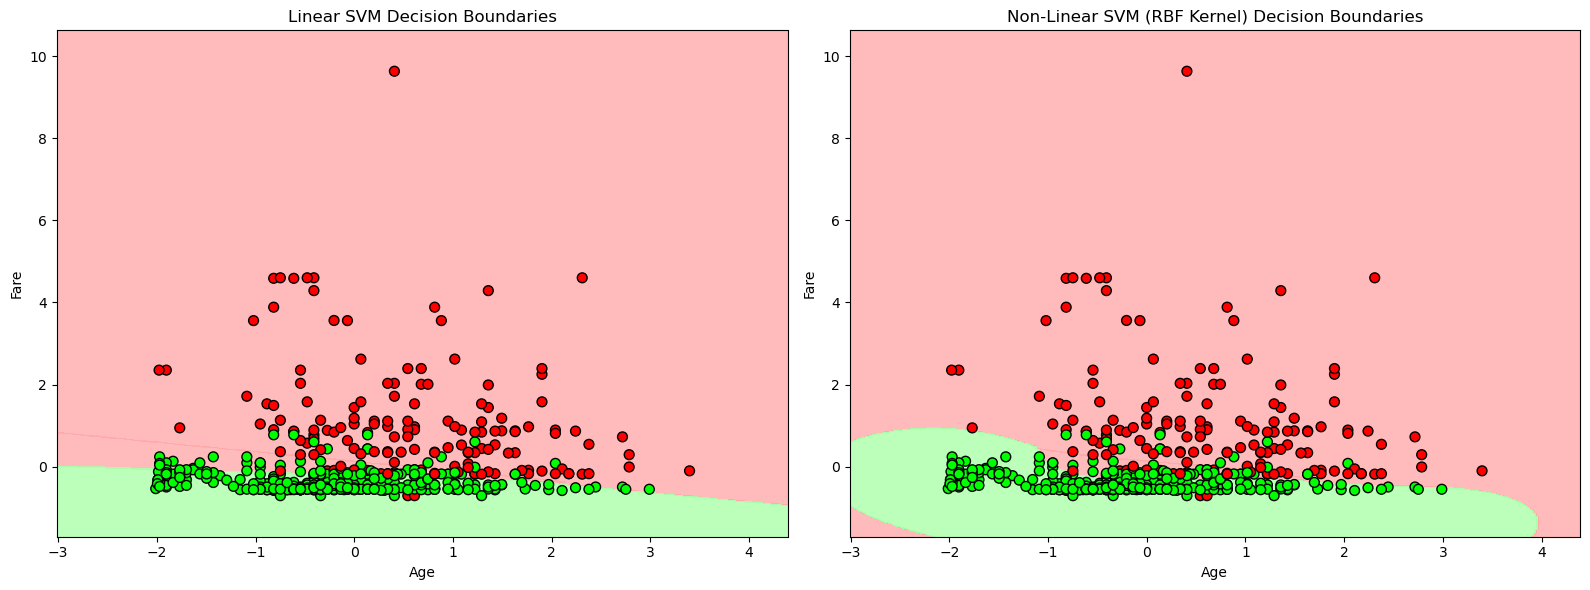

In [78]:
# Define plot boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Create grid to evaluate model
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Plotting Linear SVM
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
Z = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00']), s=50)
plt.title('Linear SVM Decision Boundaries')
plt.xlabel('Age')
plt.ylabel('Fare')

# Plotting Non-Linear SVM (RBF Kernel)
plt.subplot(1, 2, 2)
Z = nonlinear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#00FF00']), s=50)
plt.title('Non-Linear SVM (RBF Kernel) Decision Boundaries')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()

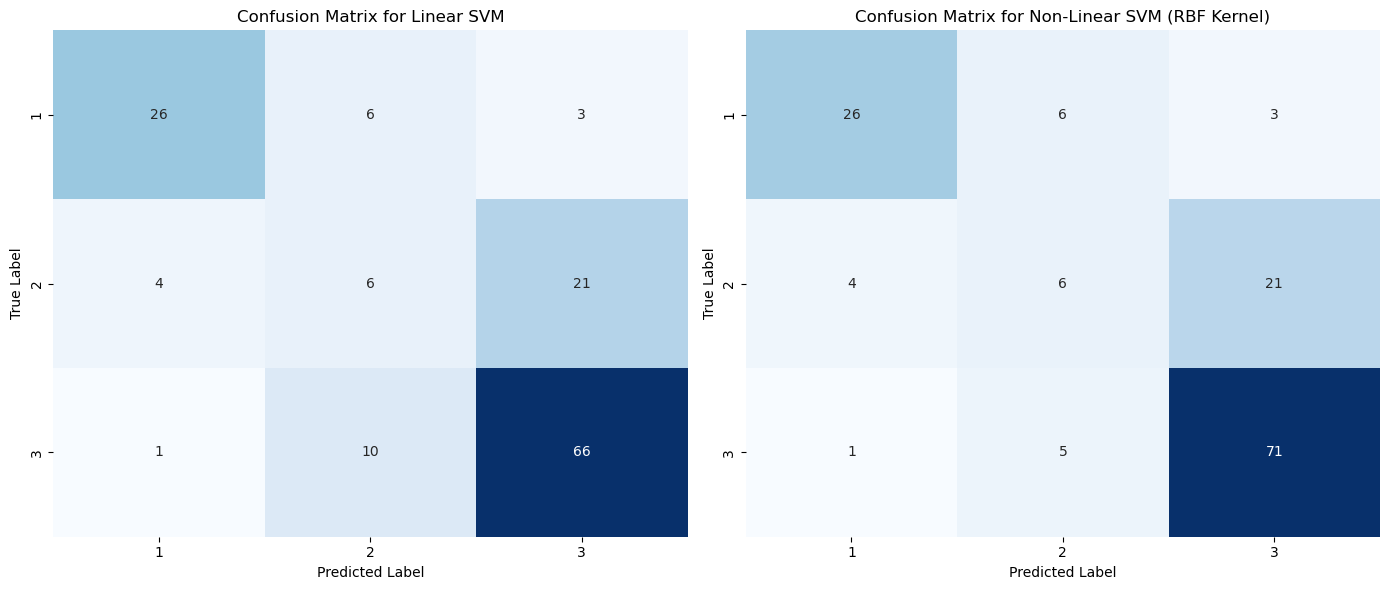

In [79]:
# Compute confusion matrices
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_nonlinear = confusion_matrix(y_test, y_pred_nonlinear)

# Plot confusion matrices
plt.figure(figsize=(14, 6))

# Confusion Matrix for Linear SVM
plt.subplot(1, 2, 1)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Linear SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Confusion Matrix for Non-Linear SVM
plt.subplot(1, 2, 2)
sns.heatmap(cm_nonlinear, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Non-Linear SVM (RBF Kernel)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

<h3>Dataset Pertama: Heart Disease Dataset

### Binary Class SVM

In [80]:
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Linear SVM Accuracy:  0.7951219512195122


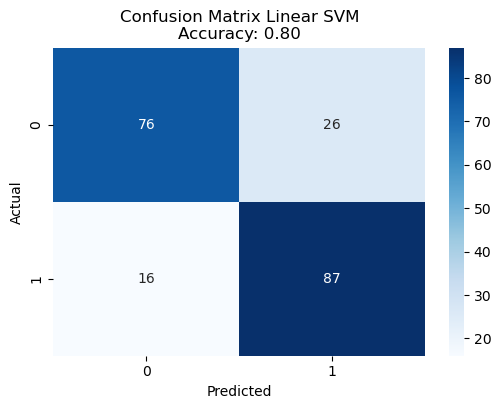

Non-Linear SVM (RBF Kernel) Accuracy:  0.8146341463414634


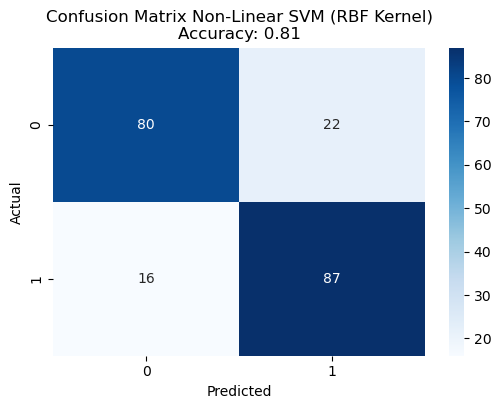

In [81]:
# Preprocessing
data = pd.read_csv("heart.csv")
heart_df = data[['age', 'sex', 'chol', 'trestbps', 'thalach', 'cp', 'target']].dropna()

#Karena dataset saya sudah dikelompokkan atau di mapping jd saya tidak melakukan mapping lagi
X = heart_df[['age', 'sex', 'chol', 'trestbps', 'thalach', 'cp']]
y = heart_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1.1 Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
linear_acc = accuracy_score(y_test, y_pred_linear)
print("Linear SVM Accuracy: ", linear_acc)

# Plot confusion matrix for Linear SVM
cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix Linear SVM\nAccuracy: {linear_acc:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 1.2 Non-Linear SVM (RBF Kernel)
nonlinear_svm = SVC(kernel='rbf')
nonlinear_svm.fit(X_train, y_train)
y_pred_nonlinear = nonlinear_svm.predict(X_test)
nonlinear_acc = accuracy_score(y_test, y_pred_nonlinear)
print("Non-Linear SVM (RBF Kernel) Accuracy: ", nonlinear_acc)

# Plot confusing matrix for Non-Linear SVM
cm_nonlinear = confusion_matrix(y_test, y_pred_nonlinear)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nonlinear, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix Non-Linear SVM (RBF Kernel)\nAccuracy: {nonlinear_acc:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [82]:
from sklearn.metrics import classification_report

# Display evaluation metrics for Linear SVM
print("Evaluation Metrics for Linear SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))


Evaluation Metrics for Linear SVM:
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.78       102
           1       0.77      0.84      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [83]:
# Display evaluation metrics for Non-Linear SVM
print("\nEvaluation Metrics for Non-Linear SVM (RBF Kernel):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nonlinear):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nonlinear))



Evaluation Metrics for Non-Linear SVM (RBF Kernel):
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       102
           1       0.80      0.84      0.82       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



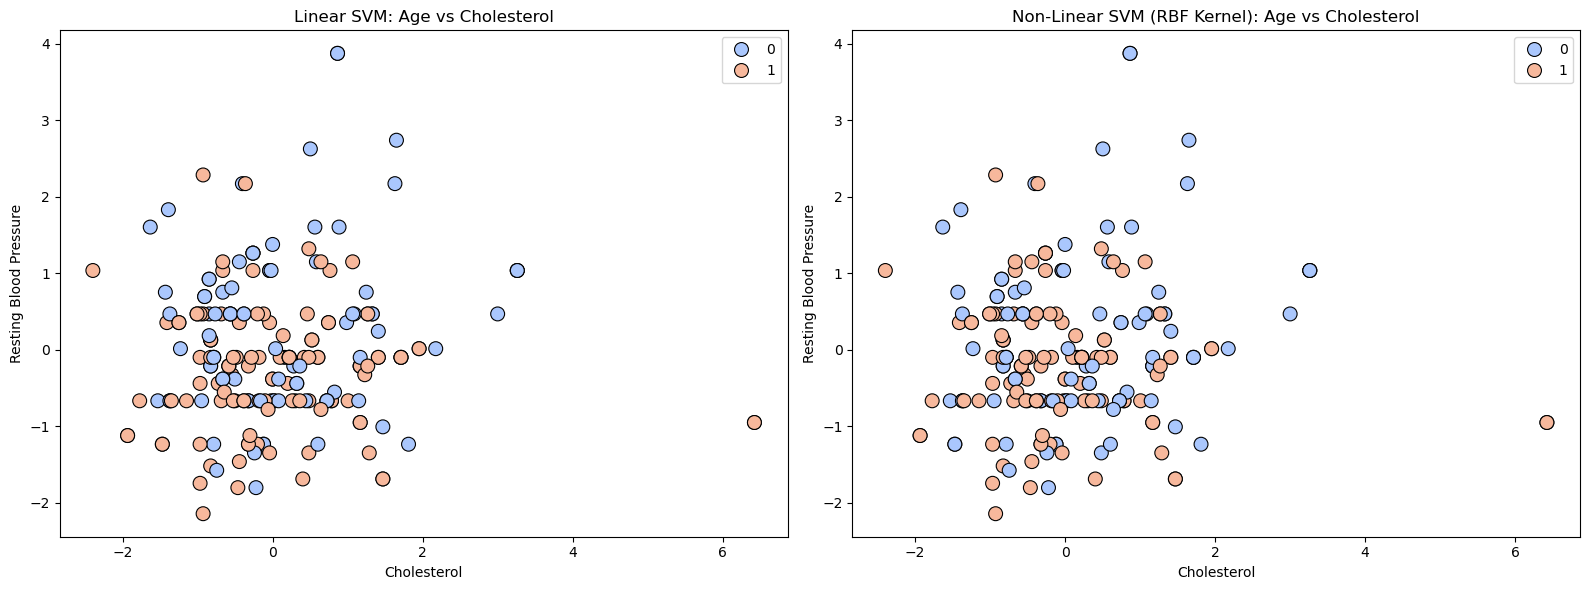

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 1.1 Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

# 1.2 Non-Linear SVM (RBF Kernel)
nonlinear_svm = SVC(kernel='rbf')
nonlinear_svm.fit(X_train, y_train)
y_pred_nonlinear = nonlinear_svm.predict(X_test)

# Create a figure with two subplots side by side
plt.figure(figsize=(16, 6))

# Plot for Linear SVM
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=y_pred_linear, palette='coolwarm', s=100, edgecolor='k')
plt.title("Linear SVM: Age vs Cholesterol")
plt.xlabel("Cholesterol")
plt.ylabel("Resting Blood Pressure")

# Plot for Non-Linear SVM (RBF Kernel)
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=y_pred_nonlinear, palette='coolwarm', s=100, edgecolor='k')
plt.title("Non-Linear SVM (RBF Kernel): Age vs Cholesterol")
plt.xlabel("Cholesterol")
plt.ylabel("Resting Blood Pressure")

# Adjust Layout
plt.tight_layout()
plt.show()


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load dataset
data = pd.read_csv("heart.csv")

# PreProcessing
heart_df = data[['age', 'sex', 'chol', 'trestbps', 'thalach', 'cp', 'target']].dropna()

#Karena dataset saya sudah dikelompokkan atau di mapping jd saya tidak melakukan mapping lagi
X = heart_df[['chol', 'trestbps']]
y = heart_df['target']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Standarize The Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Define plot boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Create grid to evaluate model
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
np.arange(y_min, y_max, 0.02))

# Predict class for each point in the grid using only the first two features
Z = linear_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plotting
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

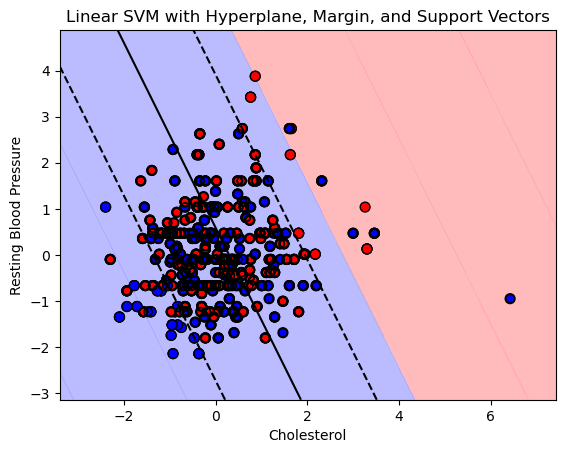

In [86]:
# Plot decision boundary and margins
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

# Plot support vectors
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=ListedColormap(['#FF0000', '#0000FF']), s=50)
plt.scatter(linear_svm.support_vectors_[:, 0], linear_svm.support_vectors_[:, 1], facecolors='none', edgecolors='k')

# Plot titles and labels
plt.title('Linear SVM with Hyperplane, Margin, and Support Vectors')
plt.xlabel('Cholesterol')
plt.ylabel('Resting Blood Pressure')

# Show the plot
plt.show()


<h3>Dataset Kedua: Heart Failure Prediction Dataset</h3>

### Multi-Class SVM and Non-Linear SVM

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = pd.read_csv("heartfailure.csv")

# Preprocessing
data = data[['RestingBP', 'Cholesterol', 'HeartDisease']].dropna()
X = data[['RestingBP', 'Cholesterol']]
y = data['HeartDisease']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Standarize The Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#2.1 Multi Class SVM with Linear Kernel
linear_svm = SVC(kernel='linear', decision_function_shape='ovr')
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

#Display Evaluation metrics for Linear SVM
print('Evaluation Metrics for Multi-Class SVM (Linear Kernel):')
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.2f}")
print("Classification Report: ")
print(classification_report(y_test, y_pred_linear))

#2.2 Multi Class SVM with Non-Linear Kernel (RBF)
nonlinear_svm = SVC(kernel='rbf', decision_function_shape='ovr')
nonlinear_svm.fit(X_train, y_train)
y_pred_nonlinear = nonlinear_svm.predict(X_test)

#Display Evaluation metrics for Non-Linear SVM
print('\nEvaluation Metrics for Non-Linear SVM (RBF Kernel):')
print(f"Accuracy: {accuracy_score(y_test, y_pred_nonlinear):.2f}")
print("Classification Report: ")
print(classification_report(y_test, y_pred_nonlinear))

Evaluation Metrics for Multi-Class SVM (Linear Kernel):
Accuracy: 0.55
Classification Report: 
              precision    recall  f1-score   support

           0       0.47      0.61      0.53        77
           1       0.65      0.51      0.57       107

    accuracy                           0.55       184
   macro avg       0.56      0.56      0.55       184
weighted avg       0.57      0.55      0.56       184


Evaluation Metrics for Non-Linear SVM (RBF Kernel):
Accuracy: 0.61
Classification Report: 
              precision    recall  f1-score   support

           0       0.53      0.61      0.57        77
           1       0.69      0.62      0.65       107

    accuracy                           0.61       184
   macro avg       0.61      0.61      0.61       184
weighted avg       0.62      0.61      0.62       184



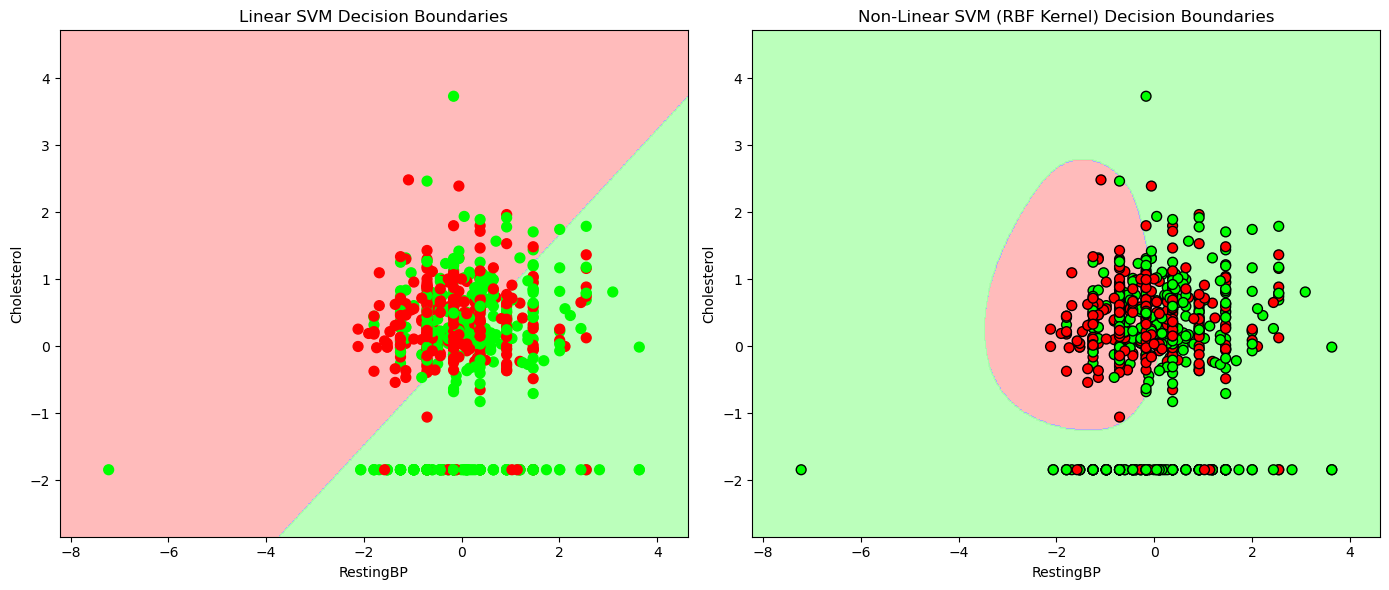

In [88]:
# Define Plot Boundaries
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Create Grid to evaluate model
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Plotting Linear SVM
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
Z = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA']))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['#FF0000', '#0000FF', '#00FF00']), s=50)
plt.title('Linear SVM Decision Boundaries')
plt.xlabel('RestingBP')
plt.ylabel('Cholesterol')

# Plotting Non-Linear SVM
plt.subplot(1,2,2)
Z = nonlinear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA']))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=ListedColormap(['#FF0000', '#0000FF', '#00FF00']), s=50)
plt.title('Non-Linear SVM (RBF Kernel) Decision Boundaries')
plt.xlabel('RestingBP')
plt.ylabel('Cholesterol')

plt.tight_layout()
plt.show()


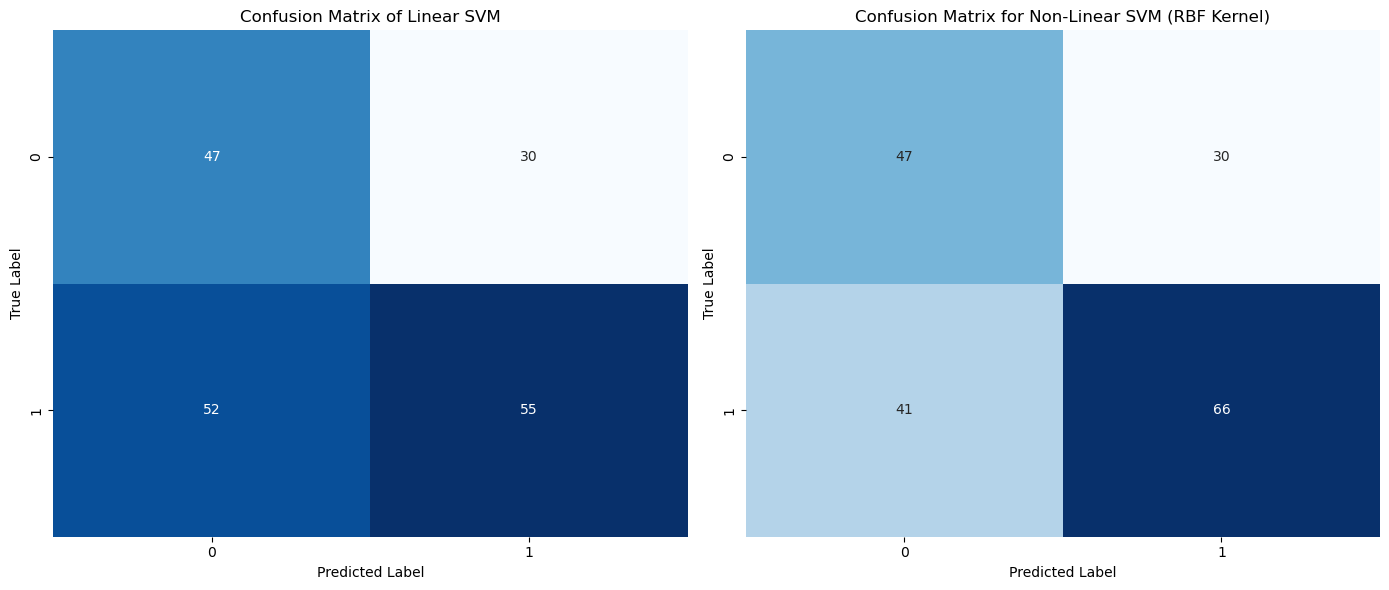

In [89]:
# Compute Confusion Matrices
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_nonlinear = confusion_matrix(y_test, y_pred_nonlinear)

# Plot Confusion Matrices
plt.figure(figsize=(14,6))

# Confusion Matrix for Linear SVM
plt.subplot(1,2,1)
sns.heatmap(cm_linear, annot=True, fmt="d", cmap='Blues', cbar=False, 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix of Linear SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Confusion Matrix for Non-Linear SVM
plt.subplot(1,2,2)
sns.heatmap(cm_nonlinear, annot=True, fmt="d", cmap='Blues', cbar=False, 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Non-Linear SVM (RBF Kernel)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


---

### Kesimpulan

- Binary Class SVM

Dengan menggunakan linear SVM dan non-linear SVM, model yang saya buat mampu melakukan training data dan memprediksi data
numerik pada data uji. Hasilnya, model saya menghasilkan akurasi sebesar 80% untuk linear SVM dan 81% untuk non-linear SVM. Akurasi
yang saya peroleh cukup tinggi, sehingga bisa saya simpulkan kalau dataset yang saya gunakan sesuai untuk algoritma ini.

- Multi-Class SVM and Non-Linear SVM

Dengan menggunakan Multi-Class linear SVM dan Multi-Class non-linear SVM, model yang saya buat mampu melakukan training data dan
memprediksi data numerik pada data uji. Hasilnya, model saya mencapai akurasi 55% untuk Multi-Class linear SVM dan 61% untuk MultiClass non-linear SVM. Akurasi yang saya peroleh cukup rendah, sehingga bisa saya simpulkan kalau dataset saya kurang cocok untuk
dipakai di algoritma ini.

In [90]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Reinhard Javera Maheswara
NIM: 	77732
Time-stamp:	2024-10-07 22:53:12.491527


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [91]:
!jupyter nbconvert --to html "./IF540L_H_laporan_M06_00000077732_Reinhard Javera Maheswara.ipynb" --output-dir="./"

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern './IF540L_H_laporan_M01_NIM_NAMA.ipynb' matched no files


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#